In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_file, show, output_notebook
from bokeh.charts import Bar
import thinkstats2
import thinkplot
from scipy import stats
import pymongo
from datetime import datetime
from collections import OrderedDict
output_notebook()

Loading BokehJS ...

In [2]:
MONGO_URL = "mongodb://localhost:27017"
connection = pymongo.MongoClient(MONGO_URL)
db = connection.livestockwatch20160415
cs_collection = db.capture_session

In [3]:
excel_handler = pd.ExcelFile("april172016.xlsx")
excel_data = pd.read_excel(excel_handler, sheetname=None)
plr_df = excel_data["plr_all"]

In [4]:
plr_df[plr_df.cs_name == "WA02_2015_11_26_10_50_10_19934"][["frametime", "svg_ca","max_area"]]

,frametime,svg_ca,max_area
698,1.93,0.358344,15951.456532


frametime
0.53    15902.288367
0.60    15631.457711
0.67    15624.215501
0.73    15679.022394
0.80    15937.743685
0.87    15951.456532
0.93    15401.231407
1.00    14966.150300
1.07    14177.672711
1.13    13606.640637
1.20    12862.729228
1.27    12301.638996
1.33    11885.900237
1.40    11619.415334
1.47             NaN
1.53             NaN
1.60             NaN
1.67             NaN
1.73             NaN
1.80             NaN
1.87    10232.502510
1.93    10141.590613
Name: area, dtype: float64

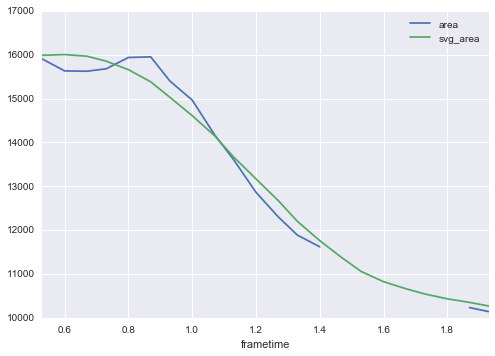

In [5]:
cs_cursor = cs_collection.find({"cs_name":"WA02_2015_11_26_10_50_10_19934"})
cs_df = pd.DataFrame([cs for cs in cs_cursor])
cs_df.index = cs_df.frametime
cs_df[cs_df.area == cs_df.max_area]
cs_df.area.plot(legend="area")
cs_df.svg_area.plot(legend="area interpolation")
cs_df.area

In [6]:
cs_df[cs_df.area == cs_df.max_area]

,_id,angle,area,aspect_ratio,ca,cattle_id,centroid,contour_area,contour_perimeter,cs_name,...,svg_area,svg_ca,svg_eccentricity,svg_ipr,svg_max_area,svg_perimeter,svg_pupil_major_axis,svg_pupil_minor_axis,timestamp,totd
frametime,,,,,,,,,,,,,,,,,,,,,
0.87,WA02_2015_11_26_10_50_10_19934_0.87,112.004364,15951.456532,1.139706,0.0,1372243682,"[704, 318]",15264.0,565.386864,WA02_2015_11_26_10_50_10_19934,...,15382.778014,0.038859,0.634223,0.967792,15951.456532,446.921609,159.162454,123.056417,2015-11-26 01:50:10,day


In [7]:
cs_df.svg_area

frametime
0.53    15987.027967
0.60    16004.706516
0.67    15966.115370
0.73    15854.054582
0.80    15659.843860
0.87    15382.778014
0.93    15029.267356
1.00    14611.636872
1.07    14153.585156
1.13    13667.649346
1.20    13168.582737
1.27    12673.554934
1.33    12199.545359
1.40    11760.917357
1.47    11367.197090
1.53    11056.472951
1.60    10823.542240
1.67    10663.955750
1.73    10542.113407
1.80    10433.286414
1.87    10350.778584
1.93    10269.520756
Name: svg_area, dtype: float64